In [1]:
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import verdict

In [4]:
import cc.atlas as atlas

In [5]:
a = atlas.Atlas( '../cc/tests/data/example_atlas', bibtex_fp='../cc/tests/data/example_atlas/example.bib' )

Loading bibliography entries.


100%|██████████| 10/10 [00:00<00:00, 31347.56it/s]

Storing bibliography entries.
Loading saved atlas data.


#### Process the bibtex notes.

In [6]:
a.data.process_bibtex_annotations( word_per_concept=True )
a.data.identify_unique_key_concepts()

Dict, {
'VandeVoort2018a' : None,
'Stern2018' : None,
'Howk2017' : None,
'Garrison-kimmel2017' : None,
'Hopkins2017' : None,
'Hafen2016' : None,
'Muratov2016' : None,
'VandeVoort2016' : None,
'Hafen2019' : None,
'Hafen2019a' : None,
}

In [7]:
a.data['Hafen2019'].process_abstract()

In [8]:
# Retrieve Atlas Data
for key, item in a.data.items():
    print( key )
    item.process_abstract()

VandeVoort2018a
Stern2018
Howk2017
Garrison-kimmel2017
Hopkins2017
Hafen2016
Muratov2016
VandeVoort2016
Hafen2019
Hafen2019a


import cProfile
profile = cProfile.run(
    '[ a.save_data() for _ in range( 100 ) ]',
    sort = 'cumtime'
)

import cProfile
profile = cProfile.run(
    "[ a.save_data( handle_jagged_arrs='filled array') for _ in range( 100 ) ]",
    sort = 'cumtime'
)

In [9]:
saved_data = a.save_data()

100%|██████████| 10/10 [00:00<00:00, 29746.84it/s]

Preparing to save data.
Saving to ../cc/tests/data/example_atlas/atlas_data.h5


# Plot

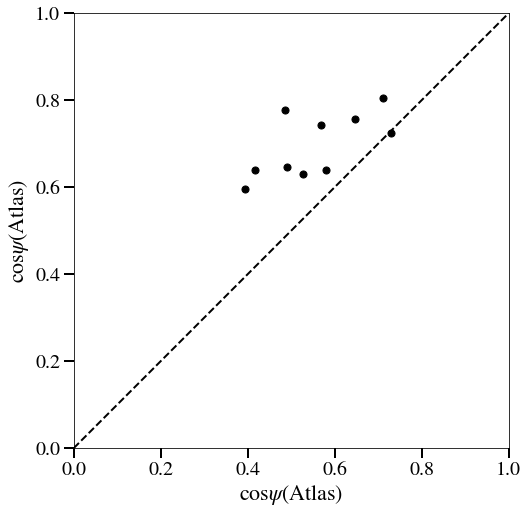

In [10]:
%matplotlib inline

figure = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

cospsi_a, cospsi_a_abs = a.plot_cospsi2d(
    a,
    a,
    y_kwargs = { 'method': 'abstract similarity'},
    ax = ax,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
    linestyle = '--',
    linewidth = 2,
    color = 'k',
)

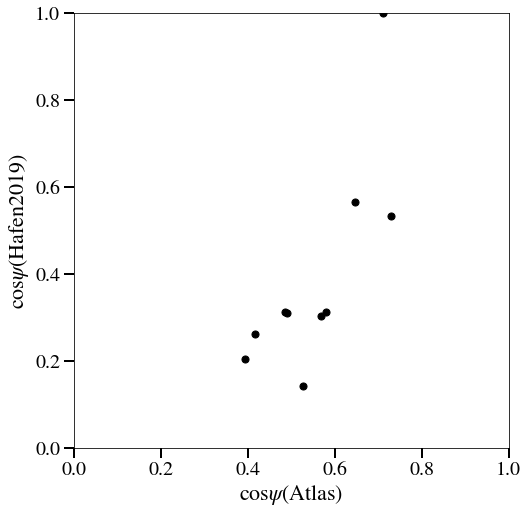

In [11]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d(
    a,
    a.data['Hafen2019'],
)

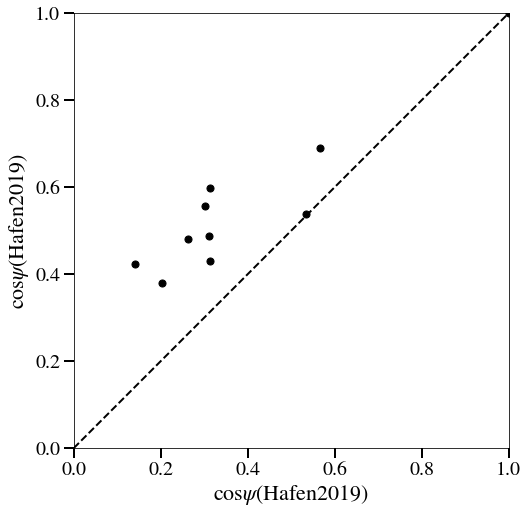

In [12]:
figure = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

cospsi_a, cospsi_h19 = a.plot_cospsi2d(
    a.data['Hafen2019'],
    a.data['Hafen2019'],
    y_kwargs = { 'method': 'abstract similarity'},
    ax = ax,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
    linestyle = '--',
    linewidth = 2,
    color = 'k',
)

# Reference-Based Exploration

## Populate

### Populate with Referenced Works
Can be done iteratively.

* Identify works to download
* Download
* Create bib
* Create atlas
* Combine atlases

### Populate with Citing Works
Can be done iteratively.

## Visualize

$\cos \Psi$ for
* central works
* a couple of concept vectors
* the vector that describes your upcoming publication
* a vector that predicts high citability 

## Select

## Read

### Download Full Text from ArXiv

### Open PDF/Mendeley Externally
While this might seem excessive, QoL differences like this are important.

### Open Figures in NB

### Natural Language Processing of Text to Create a Summary PDF

# Scratch

In [14]:
import ads

In [19]:
 a.data['Hafen2019'].references[-1]

'2020MNRAS.492.3465H'

In [32]:
p = list( ads.SearchQuery( bibcode='2020MNRAS.492.3465H' ) )[0]

In [43]:
p.bibtex

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ads/utils.py:31: UserWarning: You are lazy loading attributes via 'bibtex', and so are making multiple calls to the API. This will impact your overall rate limits.
  UserWarning,
/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ads/search.py:295: UserWarning: bibtex should be queried with ads.ExportQuery(); You will hit API ratelimits very quickly otherwise.
  "hit API ratelimits very quickly otherwise.", UserWarning)


'@ARTICLE{2020MNRAS.492.3465H,\n       author = {{Hopkins}, Philip F. and {Chan}, T.~K. and {Garrison-Kimmel}, Shea and\n         {Ji}, Suoqing and {Su}, Kung-Yi and {Hummels}, Cameron B. and\n         {Kere{\\v{s}}}, Du{\\v{s}}an and {Quataert}, Eliot and\n         {Faucher-Gigu{\\`e}re}, Claude-Andr{\\\'e}},\n        title = "{But what about...: cosmic rays, magnetic fields, conduction, and viscosity in galaxy formation}",\n      journal = {\\mnras},\n     keywords = {stars: formation, galaxies: active, galaxies: evolution, galaxies: formation, cosmology: theory, Astrophysics - Astrophysics of Galaxies, Astrophysics - Cosmology and Nongalactic Astrophysics, Astrophysics - High Energy Astrophysical Phenomena},\n         year = 2020,\n        month = mar,\n       volume = {492},\n       number = {3},\n        pages = {3465-3498},\n          doi = {10.1093/mnras/stz3321},\narchivePrefix = {arXiv},\n       eprint = {1905.04321},\n primaryClass = {astro-ph.GA},\n       adsurl = {https://u

In [17]:
q = list( ads.SearchQuery( { 'bibcode': a.data['Hafen2019'].references[0] },) _

AssertionError: q must not be empty

In [31]:
p = a.data['Hafen2019']

In [ ]:
p.

In [13]:
a.data['Hafen2019'].references

array(['1963MWRv...91...99S', '1969ApJ...156L..63B',
       '1972ApJ...176....1G', '1976ApJ...205..762S',
       '1978MNRAS.183..341W', '1980ApJ...236..577B',
       '1991ApJ...379...52W', '1993ApJ...412..455K',
       '1993ApJ...415..174W', '1995ApJS..101..181W',
       '1996ApJ...465..608T', '1998ApJ...495...80B',
       '1999ApJS..123....3L', '2000ApJ...542..535G',
       '2000ApJS..129..493H', '2001MNRAS.322..231K',
       '2003MNRAS.339..289S', '2004MNRAS.351..399G',
       '2005MNRAS.362...41G', '2005MNRAS.363....2K',
       '2005MNRAS.364.1105S', '2006ApJ...637..648S',
       '2006MNRAS.368....2D', '2006MNRAS.371..108C',
       '2006NuPhA.777..424N', '2007ApJ...655L..17B',
       '2008MNRAS.390..920O', '2009ApJ...696.1543P',
       '2009ApJ...700L...1K', '2009ApJ...703.1416F',
       '2009ApJS..182..608K', '2009ARA&A..47..481A',
       '2009MNRAS.395..160K', '2009MNRAS.396.2332K',
       '2009Natur.457..451D', '2010ApJ...709.1203T',
       '2010ApJ...717..289S', '2010ApJ...717..